In [14]:
import pandas as pd
from datetime import datetime
from functools import reduce
import os
import matplotlib.pyplot as plt
import numpy as np
# from dotenv import load_dotenv
from datetime import datetime, timedelta
from dataprep.eda import plot, create_report

from scipy.signal._peak_finding import _boolrelextrema

## Load processed Data set for EDA

In [24]:
df_processed = pd.read_parquet('C:\\Users\\Stamatis\\Desktop\\MLCryptoPredictor\\MLCryptoPredictor\\data\\external\\Technical_Indicators\\files\\btc_technical_indicators.parquet.gzip')

# Rename the columns
df_processed.columns = df_processed.columns.str.replace(' ', '_')  # Replace spaces with underscores

# df_processed.isnull().values.any()

df_processed = df_processed.ffill()

### Target creation

In [26]:
btc_target = df_processed[['Date', 'Adj_Close']].copy()  # Create DataFrame with specified columns and make a copy

btc_target['btc_daily_absolute_change'] = np.diff(btc_target.Adj_Close, prepend=float('nan'))
# Calculate absolute change in adjusted closing price and add as a new column - Method 1 (Stationary)
btc_target['btc_daily_absolute_change'] = np.diff(btc_target['Adj_Close'].values, prepend=np.nan)

# Calculate relative change in adjusted closing price and add as a new column - Method 2 (Daily Returns)
btc_target['btc_daily_returns_perc'] = btc_target['Adj_Close'].pct_change() * 100

# Calculate log difference in adjusted closing price and add as a new column
btc_target['btc_log_difference'] = np.diff(np.log(btc_target['Adj_Close']), prepend=np.nan)

# Set 'Date' column as index inplace
btc_target.set_index('Date', inplace=True)

# Calculate local extrema for different window sizes and add as new columns
window_sizes = [7, 14, 21, 30, 60]
for window_size in window_sizes:
    btc_target[f'btc_price_min_{window_size}d'] = _boolrelextrema(np.array(btc_target.Adj_Close), np.less, order=window_size) * 1
    btc_target[f'btc_price_max_{window_size}d'] = _boolrelextrema(np.array(btc_target.Adj_Close), np.greater, order=window_size) * 1


In [165]:
# btc_target.reset_index(inplace=True)
# btc_target[btc_target['Date'] >= '2020-03-08'].head(10)

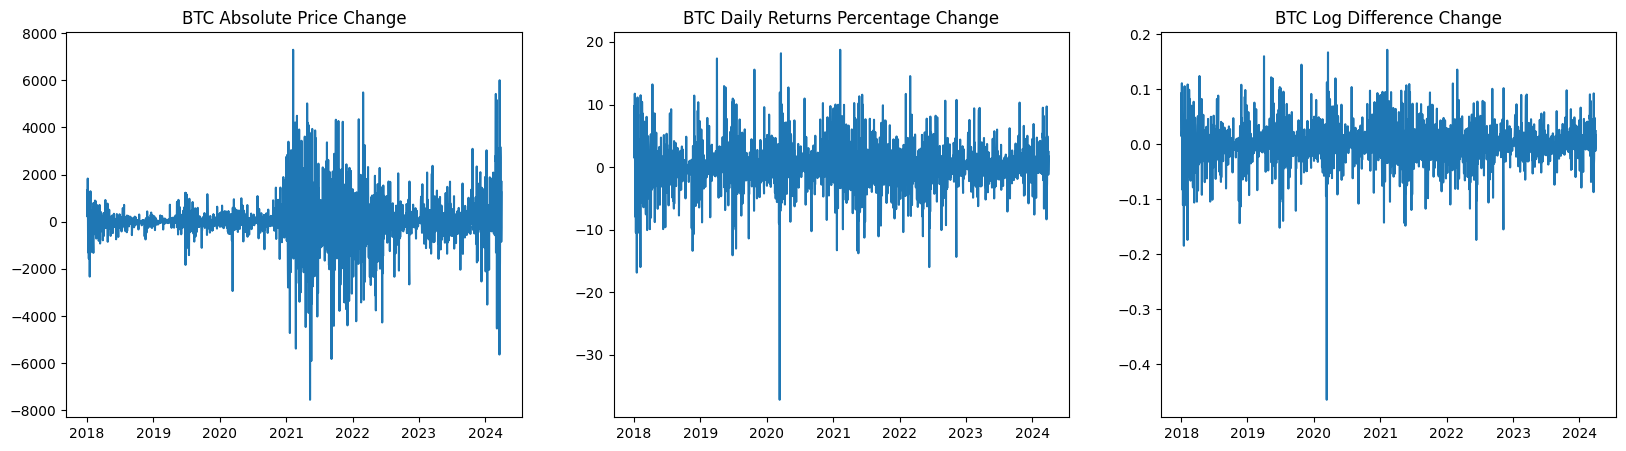

In [169]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(btc_target.btc_daily_absolute_change)
ax[0].set_title('BTC Absolute Price Change')
ax[1].plot(btc_target.btc_daily_returns_perc)
ax[1].set_title('BTC Daily Returns Percentage Change')
ax[2].plot(btc_target.btc_log_difference)
ax[2].set_title('BTC Log Difference Change')
plt.show()

In [171]:
btc_target.reset_index(inplace=True)

In [172]:
btc_target.to_parquet('btc_target.parquet.gzip', compression='gzip')

,Date,Adj_Close,btc_daily_absolute_change,btc_daily_returns_perc,btc_log_difference,btc_price_min_7d,btc_price_max_7d,btc_price_min_14d,btc_price_max_14d,btc_price_min_21d,btc_price_max_21d,btc_price_min_30d,btc_price_max_30d,btc_price_min_60d,btc_price_max_60d
0,2018-01-01,13657.200195,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0
1,2018-01-02,14982.099609,1324.899414,9.701106,0.092589,0,0,0,0,0,0,0,0,0,0
2,2018-01-03,15201.000000,218.900391,1.461080,0.014505,0,0,0,0,0,0,0,0,0,0
3,2018-01-04,15599.200195,398.200195,2.619566,0.025858,0,0,0,0,0,0,0,0,0,0
4,2018-01-05,17429.500000,1830.299805,11.733293,0.110945,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2024-03-27,69455.343750,-532.492188,-0.760835,-0.007637,0,0,0,0,0,0,0,0,0,0
2278,2024-03-28,70744.953125,1289.609375,1.856746,0.018397,0,0,0,0,0,0,0,0,0,0
2279,2024-03-29,69892.828125,-852.125000,-1.204503,-0.012118,0,0,0,0,0,0,0,0,0,0
2280,2024-03-30,69645.304688,-247.523438,-0.354147,-0.003548,0,0,0,0,0,0,0,0,0,0
